In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/mahinbindra/Downloads/scrap price.csv')

In [3]:
df.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,205.0,NaN,NaN,NaN,103.0,59.322565,1.0,52.0,103.0,154.0,205.0
symboling,205.0,NaN,NaN,NaN,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
name,205,147,toyota corona,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,205,2,gas,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,2,std,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,205,2,four,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,205,5,sedan,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,205,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,2,front,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205.0,NaN,NaN,NaN,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

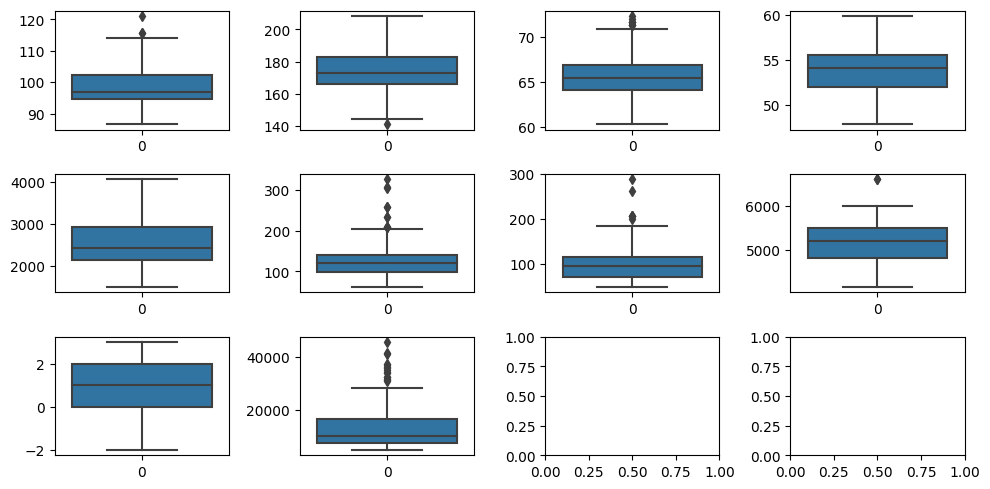

In [7]:
fig, axs = plt.subplots(3,4, figsize = (10,5))
plt1 = sns.boxplot(df['wheelbase'], ax = axs[0,0])
plt2 = sns.boxplot(df['carlength'], ax = axs[0,1])
plt3 = sns.boxplot(df['carwidth'], ax = axs[0,2])
plt4 = sns.boxplot(df['carheight'], ax = axs[0,3])
plt5 = sns.boxplot(df['curbweight'], ax = axs[1,0])
plt6 = sns.boxplot(df['enginesize'], ax = axs[1,1])
plt7 = sns.boxplot(df['horsepower'], ax = axs[1,2])
plt8 = sns.boxplot(df['peakrpm'], ax = axs[1,3])
plt9 = sns.boxplot(df['symboling'], ax = axs[2,0])
plt10 = sns.boxplot(df['price'], ax = axs[2,1])
plt.tight_layout()

In [8]:
def remove_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_scores = np.abs((data - mean) / std)
    outliers = np.where(z_scores > threshold)
    clean_data = data[~np.isin(range(len(data)), outliers)]
    return clean_data
data = df['price']
df['price'] = remove_outliers_zscore(data)

<Axes: >

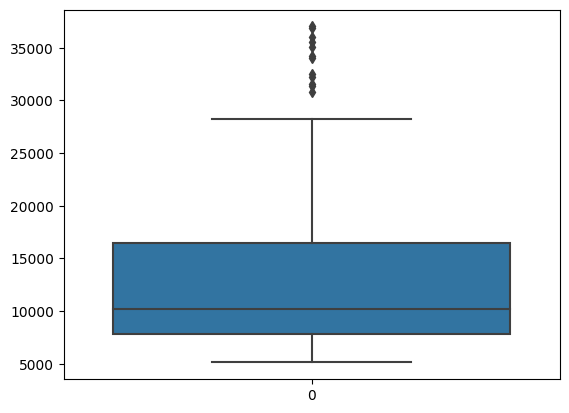

In [9]:
sns.boxplot(df['price'])

In [10]:
data = df['enginesize']
df['enginesize'] = remove_outliers_zscore(data)

<Axes: >

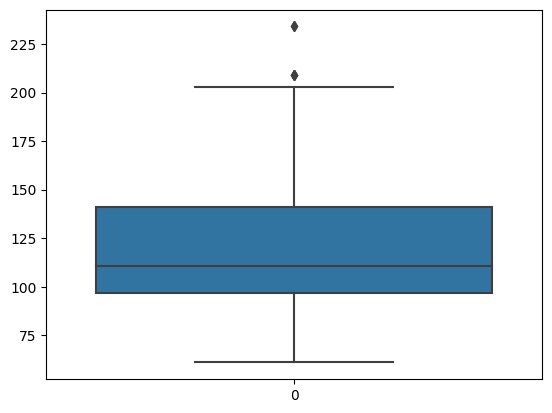

In [11]:
sns.boxplot(df['enginesize'])

In [12]:
data = df['horsepower']
df['horsepower'] = remove_outliers_zscore(data)

<Axes: >

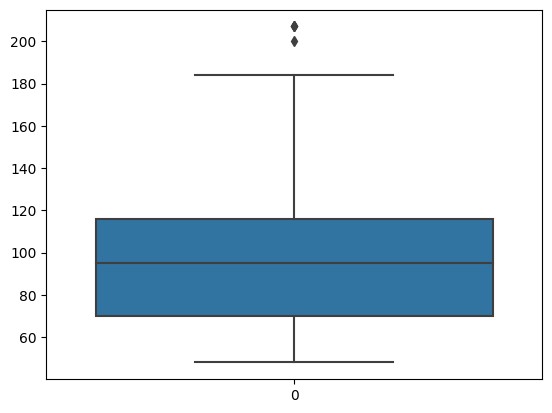

In [13]:
sns.boxplot(df['horsepower'])

In [14]:
df2 = df.copy()

In [15]:
df2.dropna(how = 'any', inplace=True)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                198 non-null    int64  
 1   symboling         198 non-null    int64  
 2   name              198 non-null    object 
 3   fueltypes         198 non-null    object 
 4   aspiration        198 non-null    object 
 5   doornumbers       198 non-null    object 
 6   carbody           198 non-null    object 
 7   drivewheels       198 non-null    object 
 8   enginelocation    198 non-null    object 
 9   wheelbase         198 non-null    float64
 10  carlength         198 non-null    float64
 11  carwidth          198 non-null    float64
 12  carheight         198 non-null    float64
 13  curbweight        198 non-null    int64  
 14  enginetype        198 non-null    object 
 15  cylindernumber    198 non-null    object 
 16  enginesize        198 non-null    float64
 17  fu

In [17]:
df2.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [18]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize", data=df2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     128.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.43e-59
Time:                        14:52:43   Log-Likelihood:                -1876.3
No. Observations:                 198   AIC:                             3765.
Df Residuals:                     192   BIC:                             3784.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.558e+04   1.19e+04     -6.327      0.0

In [19]:
df2.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
symboling,3,3,1,2,2
name,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltypes,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumbers,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [20]:
'y_hat = -67.4459carlength + 1027.7083carwidth + 282.0177carheight + 72.8955horsepower +  78.9967enginesize'

'y_hat = -67.4459carlength + 1027.7083carwidth + 282.0177carheight + 72.8955horsepower +  78.9967enginesize'

In [21]:
-7.558e+04 + (-67.4459*168.8)+ (1027.7083*64.1) + (282.0177*48.8) + (72.8955*111.0) +  (78.9967*130.0)

11034.669369999989

In [22]:
pred_vals = results.predict(df2[['carlength', 'carwidth', 'carheight', 'horsepower', 'enginesize']])
pred_vals

0      11035.957140
1      11035.957140
2      18200.575706
3      11904.174239
4      15190.267966
           ...     
200    17597.208281
201    20847.629917
202    21583.012227
203    17330.031145
204    17597.208281
Length: 198, dtype: float64

In [23]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df2['price']], axis = 1)
res

,y_hat,price
0,11035.957140,13495.0
1,11035.957140,16500.0
2,18200.575706,16500.0
3,11904.174239,13950.0
4,15190.267966,17450.0
...,...,...
200,17597.208281,16845.0
201,20847.629917,19045.0
202,21583.012227,21485.0
203,17330.031145,22470.0


In [24]:
res['error'] = res['y_hat'] - res['price']

In [25]:
res.head(1)

,y_hat,price,error
0,11035.95714,13495.0,-2459.04286


In [26]:
res['sq_error'] = res['error']**2

In [27]:
np.sqrt(res['sq_error'].mean())

3157.3792858525794

In [28]:
df2.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,104.404040,0.853535,98.395455,173.294949,65.744444,53.757071,2512.363636,121.969697,3.316364,3.247778,10.189495,100.464646,5131.313131,25.585859,31.146465,12418.435187
std,59.567804,1.259991,5.640214,11.736501,1.975393,2.425504,472.281953,31.721969,0.264726,0.302904,4.026634,34.054246,477.200266,6.349404,6.629710,6602.746943
min,1.000000,-2.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,5118.000000
25%,54.250000,0.000000,94.500000,166.300000,64.000000,52.000000,2141.250000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,20.000000,25.000000,7775.000000
50%,105.500000,1.000000,96.550000,172.800000,65.400000,54.100000,2407.500000,110.000000,3.310000,3.280000,9.000000,94.500000,5200.000000,25.000000,30.000000,9992.000000
75%,155.750000,2.000000,101.200000,180.200000,66.500000,55.500000,2846.250000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,15926.250000
max,205.000000,3.000000,115.600000,202.600000,71.700000,59.800000,3770.000000,234.000000,3.940000,3.900000,23.000000,207.000000,6600.000000,49.000000,54.000000,37028.000000


(array([ 1.,  1.,  8., 13., 13., 49., 63., 35., 11.,  4.]),
 array([-12230.44510835, -10214.63427322,  -8198.8234381 ,  -6183.01260297,
         -4167.20176784,  -2151.39093272,   -135.58009759,   1880.23073753,
          3896.04157266,   5911.85240779,   7927.66324291]),
 <BarContainer object of 10 artists>)

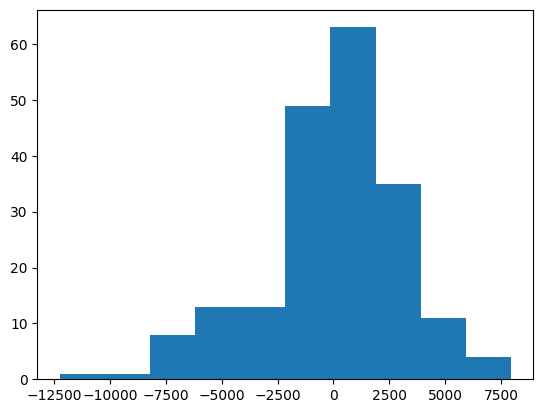

In [29]:
plt.hist(res['error'])

(array([67., 47., 26., 27., 13.,  6.,  2.,  2.,  3.,  5.]),
 array([ 5118.,  8309., 11500., 14691., 17882., 21073., 24264., 27455.,
        30646., 33837., 37028.]),
 <BarContainer object of 10 artists>)

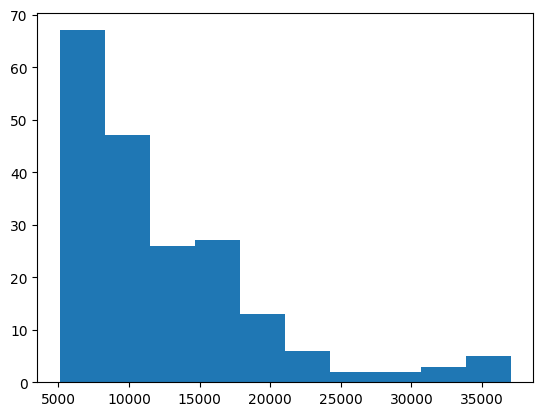

In [30]:
plt.hist(df2['price'])

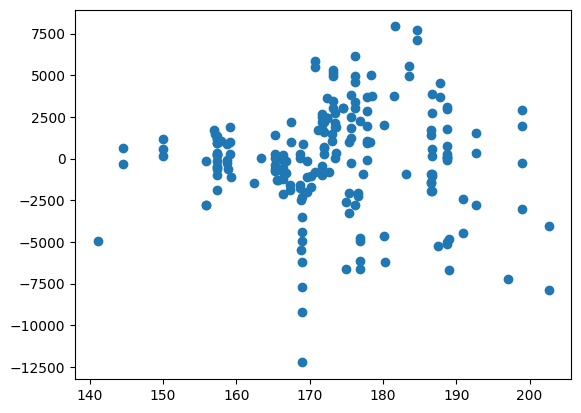

In [31]:
plt.scatter(df2['carlength'],res['error'])

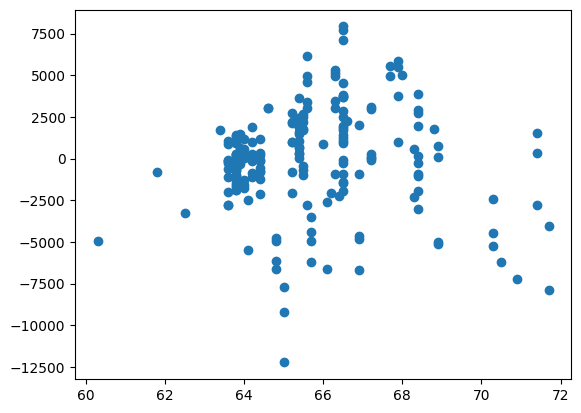

In [32]:
plt.scatter(df2['carwidth'],res['error'])

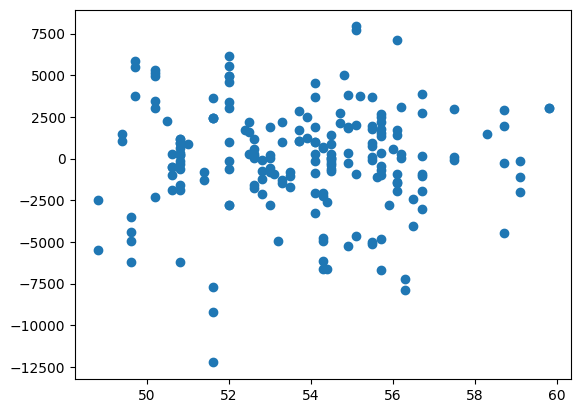

In [33]:
plt.scatter(df2['carheight'],res['error'])

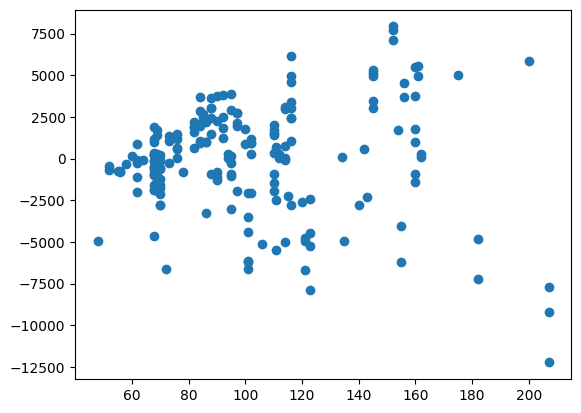

In [34]:
plt.scatter(df2['horsepower'],res['error'])

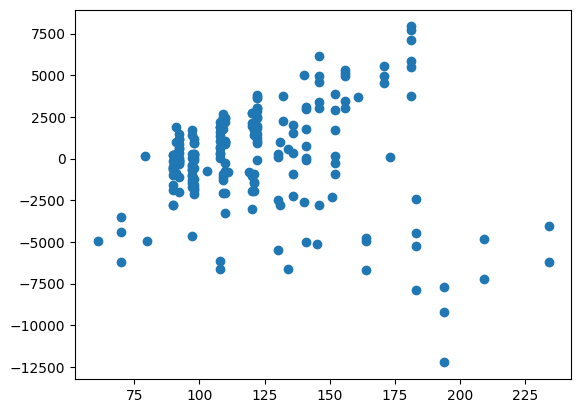

In [35]:
plt.scatter(df2['enginesize'],res['error'])

((array([-2.69735623, -2.38749403, -2.21085179, -2.08434798, -1.98440284,
         -1.90106596, -1.82915897, -1.76562835, -1.70851598, -1.65648783,
         -1.60859242, -1.56412628, -1.52255394, -1.48345801, -1.44650651,
         -1.41143085, -1.37801054, -1.3460622 , -1.31543162, -1.28598784,
         -1.25761858, -1.23022689, -1.20372838, -1.17804918, -1.15312416,
         -1.12889567, -1.10531234, -1.08232825, -1.05990214, -1.0379968 ,
         -1.01657854, -0.99561675, -0.97508355, -0.95495345, -0.93520306,
         -0.9158109 , -0.89675716, -0.87802356, -0.85959314, -0.84145018,
         -0.82358007, -0.80596916, -0.78860475, -0.77147493, -0.75456855,
         -0.73787514, -0.72138488, -0.70508848, -0.68897723, -0.67304286,
         -0.65727759, -0.64167401, -0.62622512, -0.61092427, -0.59576513,
         -0.58074168, -0.56584818, -0.55107916, -0.53642937, -0.52189382,
         -0.50746772, -0.49314646, -0.47892564, -0.46480102, -0.45076854,
         -0.43682426, -0.42296441, -0.

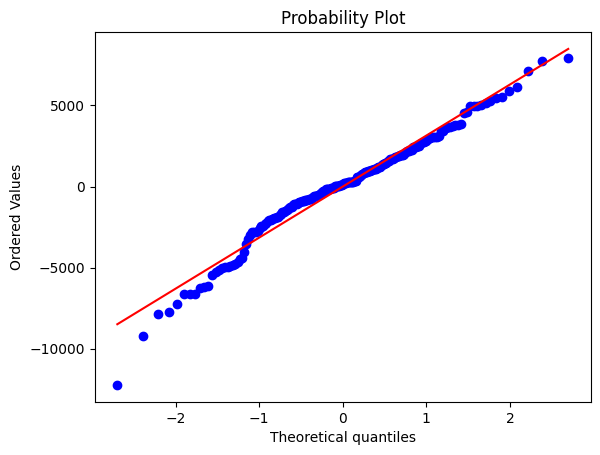

In [36]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [37]:
infl = results.get_influence()
print(infl.summary_frame())

     dfb_Intercept  dfb_carlength  dfb_carwidth  dfb_carheight   
0         0.132255       0.093270     -0.090743      -0.135148  \
1         0.295752       0.208572     -0.202922      -0.302223   
2        -0.021293       0.020621      0.016905      -0.013609   
3        -0.019623       0.010583      0.012397       0.003312   
4        -0.009189      -0.010125      0.005071       0.014244   
..             ...            ...           ...            ...   
200       0.022416      -0.001509     -0.018323       0.000390   
201       0.064653       0.012464     -0.044040      -0.034024   
202       0.001873       0.000686     -0.001430      -0.000613   
203      -0.138963       0.016715      0.117834      -0.021084   
204      -0.150797       0.010150      0.123263      -0.002623   

     dfb_horsepower  dfb_enginesize   cooks_d  standard_resid  hat_diag   
0         -0.037047        0.041513  0.004796        0.784650  0.044651  \
1         -0.082846        0.092833  0.023679        1.74

In [38]:
infl.summary_frame()

,dfb_Intercept,dfb_carlength,dfb_carwidth,dfb_carheight,dfb_horsepower,dfb_enginesize,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.132255,0.093270,-0.090743,-0.135148,-0.037047,0.041513,0.004796,0.784650,0.044651,0.169632,0.783862,0.169462
1,0.295752,0.208572,-0.202922,-0.302223,-0.082846,0.092833,0.023679,1.743509,0.044651,0.376926,1.752894,0.378955
2,-0.021293,0.020621,0.016905,-0.013609,-0.054342,-0.006228,0.001315,-0.537570,0.026570,-0.088813,-0.536572,-0.088648
3,-0.019623,0.010583,0.012397,0.003312,0.026910,-0.046994,0.000753,0.641551,0.010859,0.067221,0.640565,0.067117
4,-0.009189,-0.010125,0.005071,0.014244,0.010871,0.006427,0.000549,0.707089,0.006545,0.057392,0.706165,0.057317
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.022416,-0.001509,-0.018323,0.000390,0.002705,0.007043,0.000198,-0.237068,0.020709,-0.034474,-0.236485,-0.034389
201,0.064653,0.012464,-0.044040,-0.034024,-0.092991,0.080509,0.002573,-0.575177,0.044584,-0.124250,-0.574172,-0.124033
202,0.001873,0.000686,-0.001430,-0.000613,0.000818,-0.001900,0.000004,-0.030915,0.022276,-0.004666,-0.030834,-0.004654
203,-0.138963,0.016715,0.117834,-0.021084,-0.085549,0.011166,0.009939,1.621152,0.022187,0.244197,1.628106,0.245245


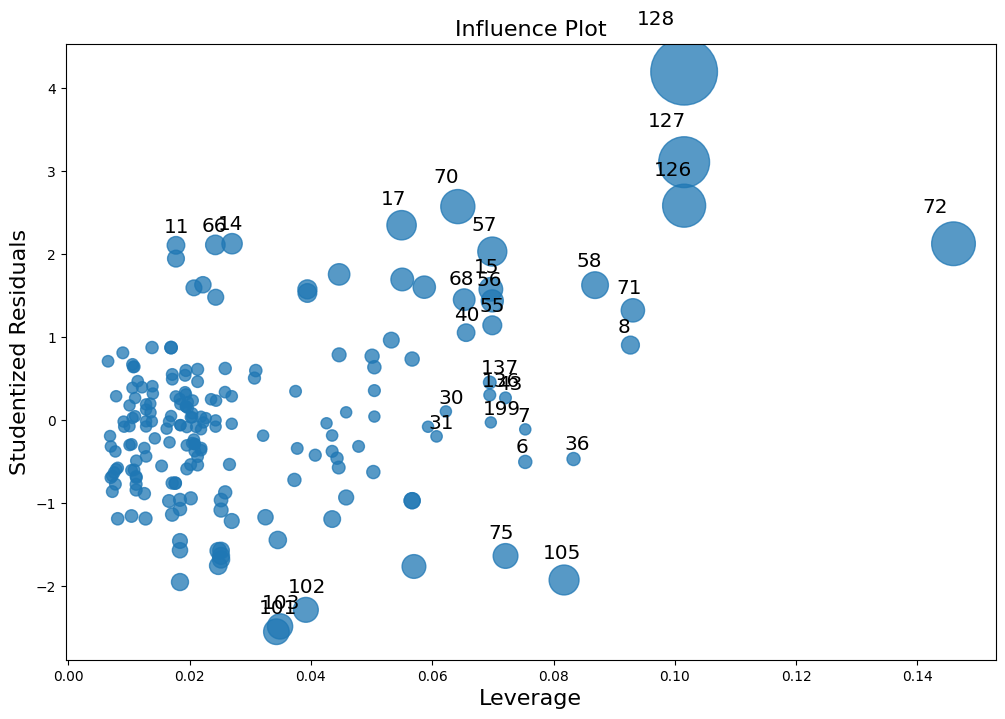

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [40]:
df3 = df2.copy()

In [41]:
df3.drop(128, inplace=True)

In [42]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize", data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.25e-59
Time:                        14:52:44   Log-Likelihood:                -1858.7
No. Observations:                 197   AIC:                             3729.
Df Residuals:                     191   BIC:                             3749.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.058e+04   1.15e+04     -6.994      0.0

In [43]:
infl = results.get_influence()
print(infl.summary_frame())

     dfb_Intercept  dfb_carlength  dfb_carwidth  dfb_carheight   
0         0.151400       0.104368     -0.104332      -0.152308  \
1         0.323302       0.222869     -0.222791      -0.325241   
2        -0.015179       0.014500      0.012244      -0.009833   
3        -0.020112       0.010944      0.012788       0.003179   
4        -0.009159      -0.012255      0.004687       0.016711   
..             ...            ...           ...            ...   
200       0.029106      -0.002301     -0.023850       0.000802   
201       0.057418       0.012123     -0.038948      -0.031518   
202      -0.000960      -0.000376      0.000731       0.000335   
203      -0.140742       0.019132      0.119602      -0.023038   
204      -0.153196       0.012113      0.125530      -0.004223   

     dfb_horsepower  dfb_enginesize   cooks_d  standard_resid  hat_diag   
0         -0.038647        0.048425  0.006252        0.892712  0.044954  \
1         -0.082527        0.103408  0.028091        1.89

In [44]:
infl.summary_frame()

,dfb_Intercept,dfb_carlength,dfb_carwidth,dfb_carheight,dfb_horsepower,dfb_enginesize,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.151400,0.104368,-0.104332,-0.152308,-0.038647,0.048425,0.006252,0.892712,0.044954,0.193679,0.892236,0.193575
1,0.323302,0.222869,-0.222791,-0.325241,-0.082527,0.103408,0.028091,1.892307,0.044954,0.410546,1.905291,0.413363
2,-0.015179,0.014500,0.012244,-0.009833,-0.036840,-0.005406,0.000574,-0.337794,0.029321,-0.058709,-0.337009,-0.058573
3,-0.020112,0.010944,0.012788,0.003179,0.026478,-0.047841,0.000780,0.652505,0.010874,0.068415,0.651521,0.068312
4,-0.009159,-0.012255,0.004687,0.016711,0.013905,0.008077,0.000710,0.793253,0.006723,0.065262,0.792481,0.065198
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.029106,-0.002301,-0.023850,0.000802,0.004172,0.009376,0.000330,-0.304828,0.020894,-0.044530,-0.304103,-0.044424
201,0.057418,0.012123,-0.038948,-0.031518,-0.084821,0.072070,0.002139,-0.522460,0.044907,-0.113289,-0.521463,-0.113073
202,-0.000960,-0.000376,0.000731,0.000335,-0.000390,0.001011,0.000001,0.016255,0.022406,0.002461,0.016212,0.002454
203,-0.140742,0.019132,0.119602,-0.023038,-0.089044,0.008679,0.010011,1.615605,0.022494,0.245082,1.622495,0.246127


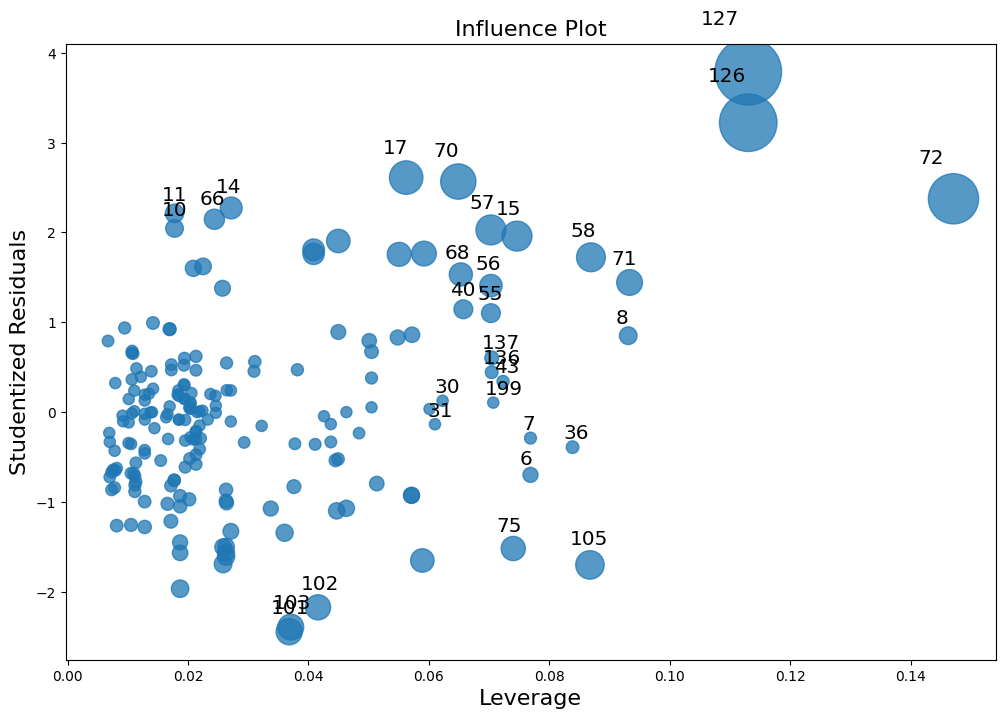

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [46]:
df3.drop(127, inplace=True)
df3.drop(126, inplace=True)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                195 non-null    int64  
 1   symboling         195 non-null    int64  
 2   name              195 non-null    object 
 3   fueltypes         195 non-null    object 
 4   aspiration        195 non-null    object 
 5   doornumbers       195 non-null    object 
 6   carbody           195 non-null    object 
 7   drivewheels       195 non-null    object 
 8   enginelocation    195 non-null    object 
 9   wheelbase         195 non-null    float64
 10  carlength         195 non-null    float64
 11  carwidth          195 non-null    float64
 12  carheight         195 non-null    float64
 13  curbweight        195 non-null    int64  
 14  enginetype        195 non-null    object 
 15  cylindernumber    195 non-null    object 
 16  enginesize        195 non-null    float64
 17  fu

In [48]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize", data=df3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.66e-60
Time:                        14:52:44   Log-Likelihood:                -1826.1
No. Observations:                 195   AIC:                             3664.
Df Residuals:                     189   BIC:                             3684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.102e+04   1.09e+04     -8.344      0.0

In [49]:
infl = results.get_influence()
print(infl.summary_frame())

     dfb_Intercept  dfb_carlength  dfb_carwidth  dfb_carheight   
0         0.194113       0.125266     -0.135373      -0.186691  \
1         0.382835       0.247053     -0.266987      -0.368197   
2         0.008252      -0.007690     -0.006860       0.005495   
3        -0.020898       0.011649      0.013521       0.002681   
4        -0.007279      -0.018216      0.002275       0.023140   
..             ...            ...           ...            ...   
200       0.044746      -0.004976     -0.036911       0.002483   
201       0.039921       0.010693     -0.026716      -0.024710   
202      -0.006894      -0.003239      0.005211       0.002873   
203      -0.142663       0.025353      0.121950      -0.027940   
204      -0.156096       0.017360      0.128765      -0.008662   

     dfb_horsepower  dfb_enginesize   cooks_d  standard_resid  hat_diag   
0         -0.036788        0.065304  0.010129        1.124933  0.045825  \
1         -0.072553        0.128794  0.038652        2.19

In [50]:
infl.summary_frame()

,dfb_Intercept,dfb_carlength,dfb_carwidth,dfb_carheight,dfb_horsepower,dfb_enginesize,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.194113,0.125266,-0.135373,-0.186691,-0.036788,0.065304,0.010129,1.124933,0.045825,0.246528,1.125728,0.246702
1,0.382835,0.247053,-0.266987,-0.368197,-0.072553,0.128794,0.038652,2.197467,0.045825,0.481573,2.220192,0.486553
2,0.008252,-0.007690,-0.006860,0.005495,0.018001,0.003932,0.000122,0.137373,0.037235,0.027016,0.137016,0.026945
3,-0.020898,0.011649,0.013521,0.002681,0.024505,-0.048783,0.000810,0.663606,0.010916,0.069716,0.662620,0.069613
4,-0.007279,-0.018216,0.002275,0.023140,0.022844,0.012975,0.001158,0.976544,0.007235,0.083368,0.976424,0.083358
...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.044746,-0.004976,-0.036911,0.002483,0.009062,0.015388,0.000759,-0.456006,0.021427,-0.067476,-0.455049,-0.067335
201,0.039921,0.010693,-0.026716,-0.024710,-0.063805,0.051308,0.001206,-0.388075,0.045837,-0.085057,-0.387201,-0.084866
202,-0.006894,-0.003239,0.005211,0.002873,-0.002173,0.008098,0.000061,0.125802,0.022782,0.019208,0.125474,0.019158
203,-0.142663,0.025353,0.121950,-0.027940,-0.096413,0.001675,0.009798,1.567098,0.023379,0.242464,1.573201,0.243409


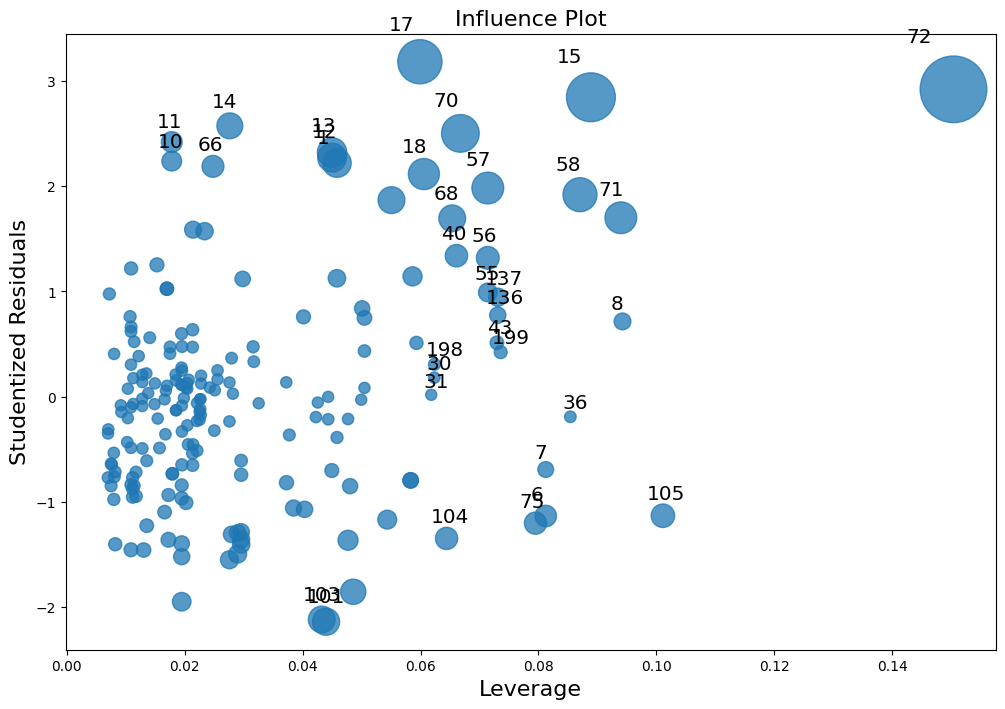

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [52]:
df4 = df3.copy()

In [53]:
df4.drop(72,inplace=True)

In [54]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize", data=df4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.29e-58
Time:                        14:52:44   Log-Likelihood:                -1813.0
No. Observations:                 194   AIC:                             3638.
Df Residuals:                     188   BIC:                             3658.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.901e+04   1.07e+04     -8.305      0.0

In [55]:
df4.head().transpose()

,0,1,2,3,4
ID,1,2,3,4,5
symboling,3,3,1,2,2
name,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltypes,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumbers,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [56]:
df4.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,194.0,NaN,NaN,NaN,104.201031,60.067025,1.0,53.25,104.5,156.75,205.0
symboling,194.0,NaN,NaN,NaN,0.809278,1.234108,-2.0,0.0,1.0,2.0,3.0
name,194,137,peugeot 504,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,194,2,gas,174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,194,2,std,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,194,2,four,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,194,5,sedan,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,194,3,fwd,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,194,1,front,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,194.0,NaN,NaN,NaN,98.542268,5.585962,86.6,94.5,96.9,101.2,115.6


In [57]:
df4['fueltypes'].unique()

array(['gas', 'diesel'], dtype=object)

In [58]:
df4['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [59]:
df4['drivewheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [60]:
df4['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [61]:
df4['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [62]:
def type_of_fuel(x):
    if x == 'gas':
        return 0
    elif x == 'diesel':
        return 1

In [63]:
def type_of_carbody(x):
    if x == 'convertible':
        return 0
    elif x == 'hatchback':
        return 1
    elif x == 'sedan':
        return 2
    elif x == 'wagon':
        return 3
    elif x == 'hardtop':
        return 4

In [64]:
def type_of_drivewheels(x):
    if x == 'rwd':
        return 0
    elif x == 'fwd':
        return 1
    elif x == '4wd':
        return 2

In [65]:
def type_of_engine(x):
    if x == 'dohc':
        return 0
    elif x == 'ohcv':
        return 1
    elif x == 'ohc':
        return 2
    elif x == 'l':
        return 3
    elif x == 'rotor':
        return 4
    elif x == 'ohcf':
        return 5

In [66]:
def type_of_aspiration(x):
    if x == 'std':
        return 0
    elif x == 'turbo':
        return 1

In [67]:
df4['fueltypes'] = df4['fueltypes'].apply(type_of_fuel)
df4['carbody'] = df4['carbody'].apply(type_of_carbody)
df4['drivewheels'] = df4['drivewheels'].apply(type_of_drivewheels)
df4['enginetype'] = df4['enginetype'].apply(type_of_engine)
df4['aspiration'] = df4['aspiration'].apply(type_of_aspiration)

In [68]:
df4

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,two,0,0,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,two,0,0,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,two,1,0,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,four,2,1,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,four,2,2,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),0,0,four,2,0,front,109.1,...,141.0,mpfi,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,202,-1,volvo 144ea,0,1,four,2,0,front,109.1,...,141.0,mpfi,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,203,-1,volvo 244dl,0,0,four,2,0,front,109.1,...,173.0,mpfi,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,204,-1,volvo 246,1,1,four,2,0,front,109.1,...,145.0,idi,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [69]:
df4['aspiration'].unique()

array([0, 1])

In [70]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize + fueltypes + carbody + drivewheels + enginetype", data=df4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     81.05
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.05e-59
Time:                        14:52:44   Log-Likelihood:                -1801.5
No. Observations:                 194   AIC:                             3623.
Df Residuals:                     184   BIC:                             3656.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.021e+04   1.09e+04     -7.357      

In [71]:
results = ols("price ~ carlength + carwidth + carheight + horsepower + enginesize + fueltypes + carbody + drivewheels + enginetype + aspiration", data=df4).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     72.68
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           2.51e-58
Time:                        14:52:45   Log-Likelihood:                -1801.3
No. Observations:                 194   AIC:                             3625.
Df Residuals:                     183   BIC:                             3661.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.082e+04    1.1e+04     -7.352      

In [72]:
categorical_features = ['fueltypes', 'carbody', 'drivewheels', 'enginetype', 'aspiration' ]
numerical_features = ['carlength', 'carwidth', 'carheight', 'horsepower', 'enginesize']
target = 'price'

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df4[categorical_features + numerical_features]
                                                     ,df4[target],
                                                    test_size = 0.3, random_state=1234)

In [75]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])


In [76]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [77]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fueltypes', 'carbody',
                                                   'drivewheels', 'enginetype',
                                                   'aspiration']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carlength', 'carwidth',
                                                   'carheight', 'horsepower',
                                                   'enginesize'])])),
                ('regressor', LinearRegression())])

In [78]:
pred = linear_regression.predict(X_test)
pred

array([17233., 12753.,  6010.,  7624., 10917., 12698., 14779., 20867.,
       21177.,  5369.,  5762.,  9123., 27632.,  8314.,  6170., 13270.,
       11407.,  4868., 16611., 10238., 19692., 14884., 19816., 13863.,
       16142.,   691., 12692., 12667., 18561., 20751., 17672., 17157.,
       12678.,  9988.,  4608.,  6452., 15211.,  6369., 12229., 10288.,
        5142., 17988.,  6375.,  6016.,  9123.,  8022., 19080., -4855.,
       11951., 11678.,  9382., 12962., 10905., 13199., 13270., 11407.,
       11094., 20365.,  9799.])

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
# Calculate MSE for linear regression model
np.sqrt(mean_squared_error(pred,y_test))

3032.203664579549

In [81]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [82]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fueltypes', 'carbody',
                                                   'drivewheels', 'enginetype',
                                                   'aspiration']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carlength', 'carwidth',
                                                   'carheight', 'horsepower',
                                                   'enginesize'])])),
                ('regressor', Ridge(alpha=3.0))])

In [83]:
ridge_pred = ridge_regression.predict(X_test)

In [84]:
np.sqrt(mean_squared_error(ridge_pred,y_test))

2690.38688485757

In [85]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [86]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fueltypes', 'carbody',
                                                   'drivewheels', 'enginetype',
                                                   'aspiration']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carlength', 'carwidth',
                                                   'carheight', 'horsepower',
                                                   'enginesize'])])),
                ('regressor', Lasso())])

In [87]:
lasso_pred = lasso_regression.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

3015.626329937386

In [89]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [90]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['fueltypes', 'carbody',
                                                   'drivewheels', 'enginetype',
                                                   'aspiration']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['carlength', 'carwidth',
                                                   'carheight', 'horsepower',
                                                   'enginesize'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [91]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [92]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

2698.913965390752

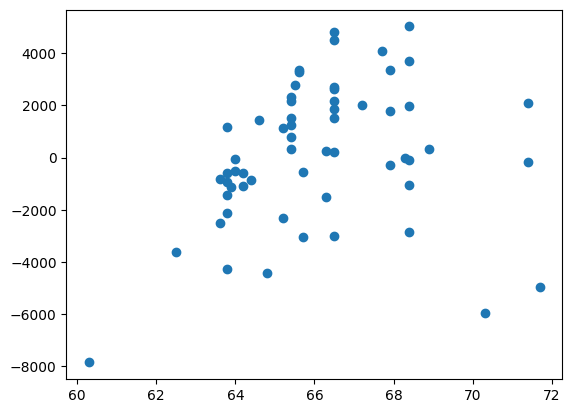

In [93]:
ridge_pred_net = pd.concat([pd.DataFrame(ridge_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
ridge_pred_net['res'] = ridge_pred_net['pred'] - ridge_pred_net['price']
plt.scatter(X_test['carwidth'],ridge_pred_net['res'])

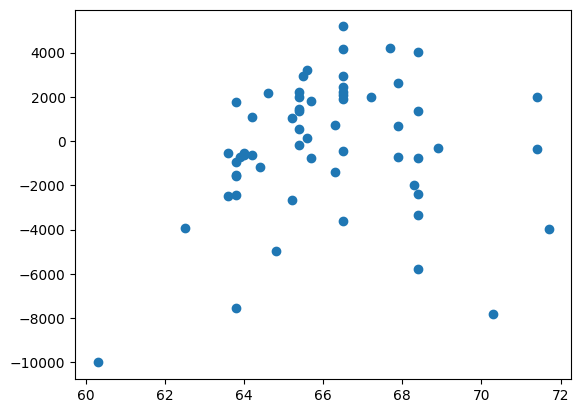

In [94]:
linear_pred_net = pd.concat([pd.DataFrame(pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)
linear_pred_net['res'] = linear_pred_net['pred'] - linear_pred_net['price']
plt.scatter(X_test['carwidth'],linear_pred_net['res'])